In [37]:
import numpy as np
import pandas as pd
import requests
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

In [55]:
city = 'delhi'

In [56]:
data = pd.read_csv("one_month_{}.csv".format(city))

In [57]:
data.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,173,266.0,2023-07-03:18,17.0,104.0,208.0,73.0,48.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,184,293.7,2023-07-03:17,21.3,112.0,208.7,81.0,58.3,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,184,321.3,2023-07-03:16,25.7,120.0,209.3,81.0,68.7,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,181,349.0,2023-07-03:15,30.0,128.0,210.0,79.0,79.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,185,298.0,2023-07-03:14,23.0,162.3,200.3,82.0,82.3,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800


In [58]:
df = data.drop(['co', 'timestamp_local', 'timestamp_utc', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'ts'], axis='columns')

In [59]:
df.head()

,aqi,datetime
0,173,2023-07-03:18
1,184,2023-07-03:17
2,184,2023-07-03:16
3,181,2023-07-03:15
4,185,2023-07-03:14


In [60]:
import matplotlib.pyplot as plt

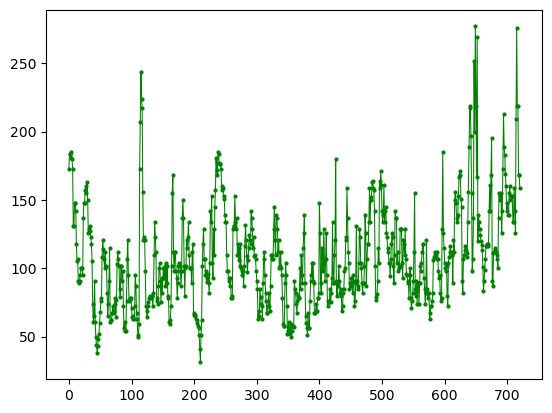

In [61]:
plt.plot(df['aqi'], color='green', marker='o', linewidth=0.75, markersize=2)
plt.show()

In [62]:
Y = df['aqi']
Y = np.array(Y)
Y = Y.reshape(-1,1)
L = len(df)
X1 = Y[0:L-5,:]
X2 = Y[1:L-4,:]
X3 = Y[2:L-3,:]
X4 = Y[3:L-2,:]
X5 = Y[4:L-1,:]
Y = Y[5:L,:]
X = np.concatenate([X1,X2,X3,X4,X5],axis=1)

In [63]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)
X = np.reshape(X, (X.shape[0],1,X.shape[1]))

In [64]:
print(X)

[[[0.57723577 0.62195122 0.62195122 0.6097561  0.62601626]]

 [[0.62195122 0.62195122 0.6097561  0.62601626 0.60569106]]

 [[0.62195122 0.6097561  0.62601626 0.60569106 0.57723577]]

 ...

 [[0.38617886 0.72357724 0.99593496 0.76422764 0.76422764]]

 [[0.72357724 0.99593496 0.76422764 0.76422764 0.55691057]]

 [[0.99593496 0.76422764 0.76422764 0.55691057 0.55691057]]]


In [65]:
X_train = X[:500,:,:]
X_test = X[500:,:,:]
Y_train = Y[:500,:]
Y_test = Y[500:,:]

In [66]:
model = Sequential()
model.add(LSTM(10,activation = 'tanh',input_shape = (1,5),recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train,Y_train,epochs=100,verbose=2)
Predict = model.predict(X_test)

Epoch 1/100
16/16 - 1s - loss: 0.0735 - mean_absolute_error: 0.2391 - 762ms/epoch - 48ms/step
Epoch 2/100
16/16 - 0s - loss: 0.0482 - mean_absolute_error: 0.1844 - 16ms/epoch - 988us/step
Epoch 3/100
16/16 - 0s - loss: 0.0316 - mean_absolute_error: 0.1398 - 15ms/epoch - 916us/step
Epoch 4/100
16/16 - 0s - loss: 0.0200 - mean_absolute_error: 0.1049 - 15ms/epoch - 922us/step
Epoch 5/100
16/16 - 0s - loss: 0.0131 - mean_absolute_error: 0.0830 - 15ms/epoch - 934us/step
Epoch 6/100
16/16 - 0s - loss: 0.0106 - mean_absolute_error: 0.0775 - 13ms/epoch - 806us/step
Epoch 7/100
16/16 - 0s - loss: 0.0100 - mean_absolute_error: 0.0772 - 10ms/epoch - 602us/step
Epoch 8/100
16/16 - 0s - loss: 0.0096 - mean_absolute_error: 0.0764 - 9ms/epoch - 577us/step
Epoch 9/100
16/16 - 0s - loss: 0.0092 - mean_absolute_error: 0.0742 - 9ms/epoch - 549us/step
Epoch 10/100
16/16 - 0s - loss: 0.0089 - mean_absolute_error: 0.0727 - 10ms/epoch - 594us/step
Epoch 11/100
16/16 - 0s - loss: 0.0086 - mean_absolute_error:

Epoch 88/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error: 0.0508 - 9ms/epoch - 546us/step
Epoch 89/100
16/16 - 0s - loss: 0.0050 - mean_absolute_error: 0.0506 - 9ms/epoch - 536us/step
Epoch 90/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error: 0.0505 - 9ms/epoch - 543us/step
Epoch 91/100
16/16 - 0s - loss: 0.0050 - mean_absolute_error: 0.0511 - 9ms/epoch - 546us/step
Epoch 92/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error: 0.0507 - 9ms/epoch - 548us/step
Epoch 93/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error: 0.0507 - 9ms/epoch - 533us/step
Epoch 94/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error: 0.0505 - 9ms/epoch - 581us/step
Epoch 95/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error: 0.0508 - 9ms/epoch - 555us/step
Epoch 96/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error: 0.0505 - 9ms/epoch - 548us/step
Epoch 97/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error: 0.0507 - 9ms/epoch - 575us/step
Epoch 98/100
16/16 - 0s - loss: 0.0049 - mean_absolute_error

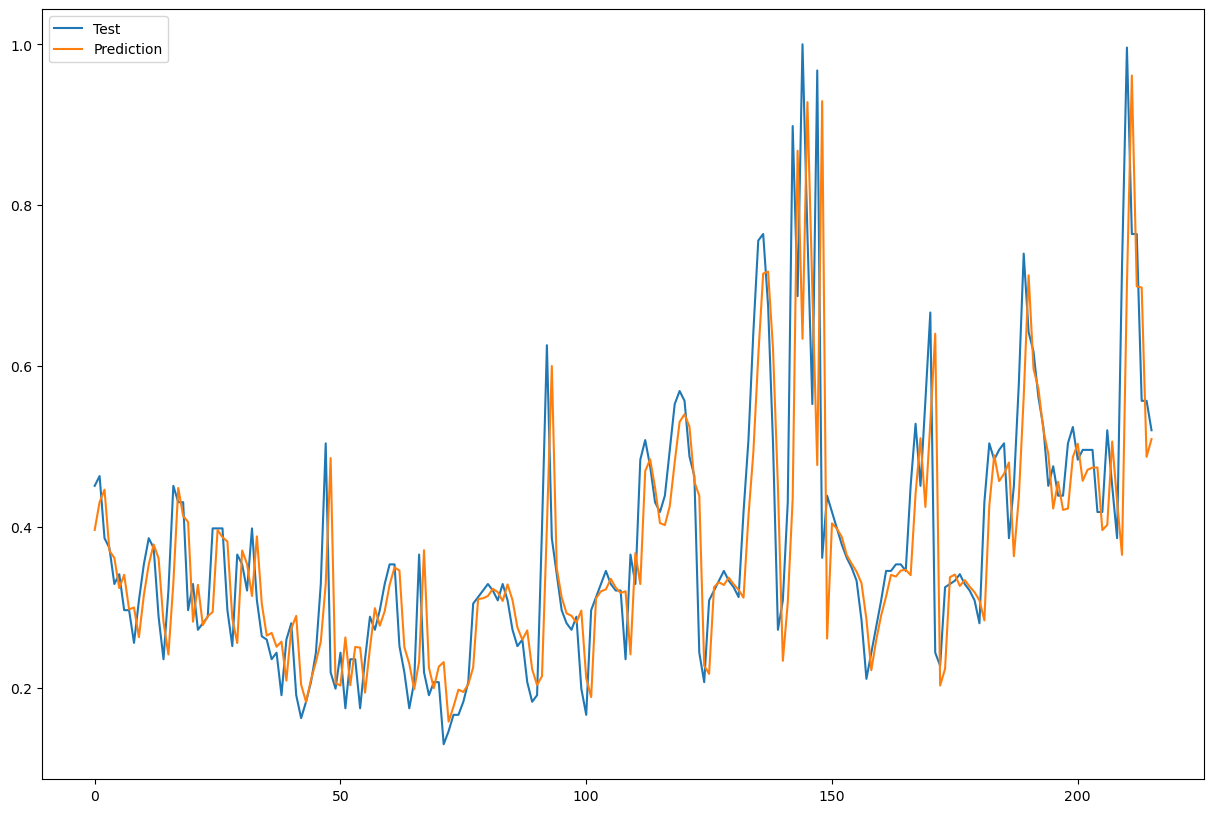

In [67]:
plt.figure(figsize=(15,10))
plt.plot(Y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [68]:
predictions = scaler1.inverse_transform(Predict)
Y_test = scaler1.inverse_transform(Y_test)

In [69]:
forecasted_aqi = predictions[-1*24:]
print(forecasted_aqi)

[[171.66733 ]
 [159.0819  ]
 [151.80244 ]
 [135.07973 ]
 [143.26915 ]
 [134.6525  ]
 [135.07156 ]
 [150.77966 ]
 [154.8781  ]
 [143.54352 ]
 [146.93419 ]
 [147.58522 ]
 [147.6163  ]
 [128.47481 ]
 [130.06253 ]
 [155.54555 ]
 [137.1434  ]
 [120.909546]
 [203.38551 ]
 [267.4574  ]
 [202.99861 ]
 [202.62682 ]
 [150.88374 ]
 [156.29755 ]]
